## Final Project Submission

Please fill out:
* Student name: Sebastian Siegler


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.tools.plotting import scatter_matrix # data processing, scatter matrix 
import statsmodels.api as sm # Python module that provides classes and functions for the estimation of many different 
#statistical models, as well as for conducting statistical tests, and statistical data exploration
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
#import xgboost as xgb
#from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from statsmodels.formula.api import ols
import folium
from folium import plugins
from folium.plugins import HeatMap

# Business Understanding

The objective of this project is to analyze which factors influence the sales prices of real estate in King County, U.S. and based on this analysis I would like to find out wheather it is possible to predict the sales 
price of a house based on its properties.
This information is particularly important for sellers, buyers, renters and investors and furthermore for businesses in the real estate market.

# Data Mining

The following work is based on a dataset of house sales in King County, U.S. between May 2014 and May 2015.
Along with the sales price it consists of 19 features which describe the sold house. The following overview gives a short describtion of the features.

In [2]:
pd.set_option('display.max_columns', 30)
f = open("column_names.md", "r")
print(f.read())

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the neares

# Data Cleaning

In [3]:
# First of all our dataset is imported into a pandas dstaframe format in order to get an overview over the data
# and in order to further work with the dataset
df_model = pd.read_csv('King_County_House_prices_dataset.csv')

# Get a first overview of the datatypes stored in the dataset
# The dataset mainly consists of integer and float types with the exception of the columns data and sqft_basement
# whose values are stored as objects
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


We can see that most of the colums exhibit an int64 or float64 format. The exceptions are the columns date and 
sqft_basement. Date is in the format mm/dd/yyyy. We will categorize this format in one of the next steps in 
order to conclude in which season the house has been sold. The colums of the sqrf_basement exhibit several rows with question marks. For further analysis we assume that these houses do not have a basement.

In [4]:
# Another overview giving first insights concerning mean, standard deviation, minimum and maximum values and the 
# destribution of the values
df_model.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df_model.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df_model.shape
# The dataset consists of a total of 21597 rows and 21 columns

(21597, 21)

In the next step I try to figure out which colums exhibit missing data
As one can see the colums yr_ronovated, waterfront and view exhibit colums with missing data.
I guess it is safe to assume that missing data in the yr_renovated column corresponds to houses which 
have never been renovated. Missing values in the waterfront column probably correspond to houses which 
do not have waterfront and missing data in the view column corresponds to houses which have not been viewed yet

In [7]:
missing_values = df_model.isnull().sum().sort_values(ascending=False)
missing_values

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64


## Dealing with missing and corrupted values

The waterfront column exhibits more than 2000 null values. I assume that these null values correspond to lots
that do not have access to water and set them to 0.

In [8]:
df_model.waterfront.fillna(0, inplace = True)

The view column shows 63 null values. It is assumed that these houses have not been viewd yet and the values are set to 0.

In [9]:
df_model.view.fillna(0, inplace = True)

The year renovated column shows almost 4000 null values. I assume that these houses have n ever been renovated 
and set the corresponding values to 0.

In [10]:
df_model.yr_renovated.fillna(0, inplace = True)

The sqft_basement column exhibts more than 400 ? values. It is assumed that these houses do not have a basement and the corresponding values are set to 0.

In [11]:
df_model["sqft_basement"].replace("?", "0", inplace = True)
df_model["sqft_basement"] = pd.to_numeric(df_model["sqft_basement"])

In [12]:
# the datatype of the date variable is changed
df_model["date"] = pd.to_datetime(df_model["date"])

## Search for Outliers

In the next step I search for outliers and try to correct the values if I can make meaningful assumptions or delete the corresponding rows if no meaningful assumptions can be made.

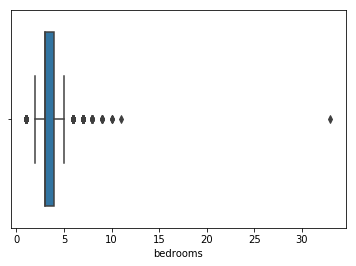

In [13]:
sns.boxplot(x=df_model['bedrooms'])

In [14]:
df_model.loc[df_model['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [15]:
# the number of bedrooms seems unreasonable considering the sqft_living value and sales price 
# so I assume a typing error and set the value to 3
df_model.at[15856,"bedrooms"]= 3

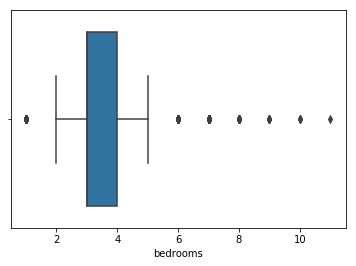

In [16]:
sns.boxplot(x=df_model['bedrooms'])

# Data Exploration

In order to get a first impression for the factors influencing the dependent variable sales price, a correlation analysis is helpful.

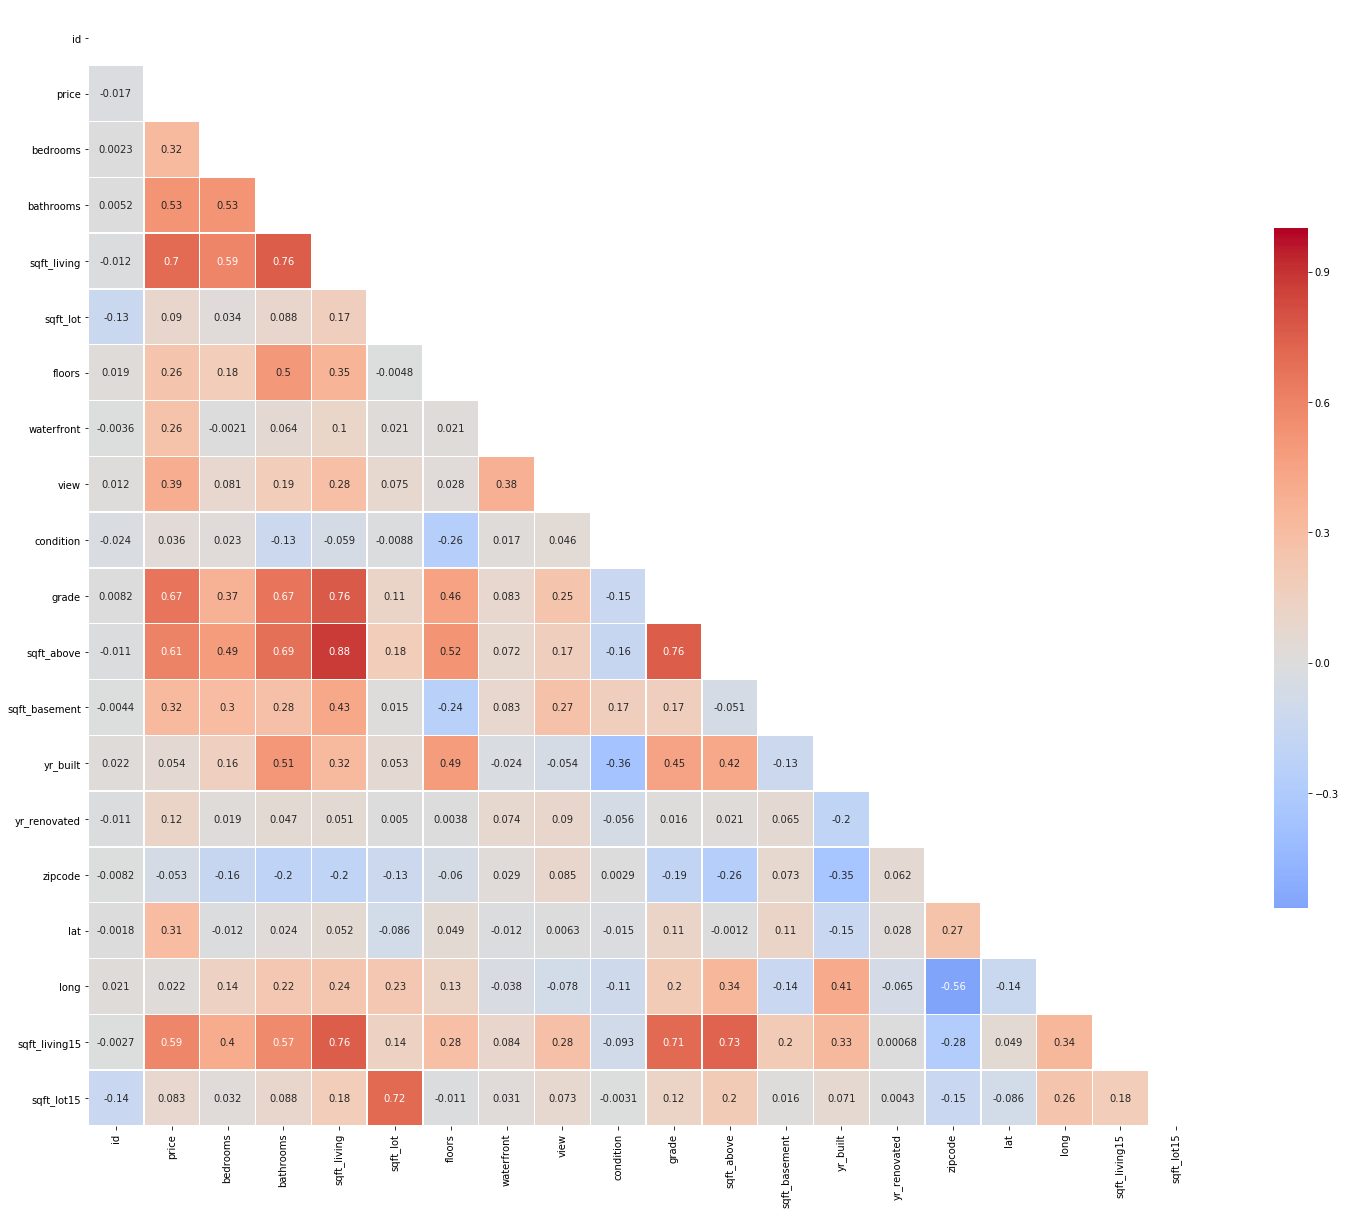

In [17]:
corr = df_model.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25, 25))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

Through this visualization several conclusions can be drawn.

1. The sales price increases with an increase of the following numerical variables: Square Feet Living, Square      Feet Above, Number of Bedrooms, Number of Bathrooms and Square Feet Basement
2. Renovated houses have higher prices than non renovated houses.
3. The location of the property plays a decisive role. Houses with a waterfront or located in the north            achieved higher prices in the past. Furthermore the size of the living room and the lot size of the neighbours played a role
4. Prices rise with higher condition, higher grade and higher view

In a next step in order to get a better understanding of how the above mentioned variables influenece the sales price, regression plots are created and the corresponding R-squared values are calculated.

R-squared: 0.49268789904035104


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


R-squared: 0.44615823299735025
R-squared: 0.3664703472658384
R-squared: 0.3425072641720194
R-squared: 0.27657672267607736
R-squared: 0.09982666915467431
R-squared: 0.10311007135689387
R-squared: 0.154839628812666


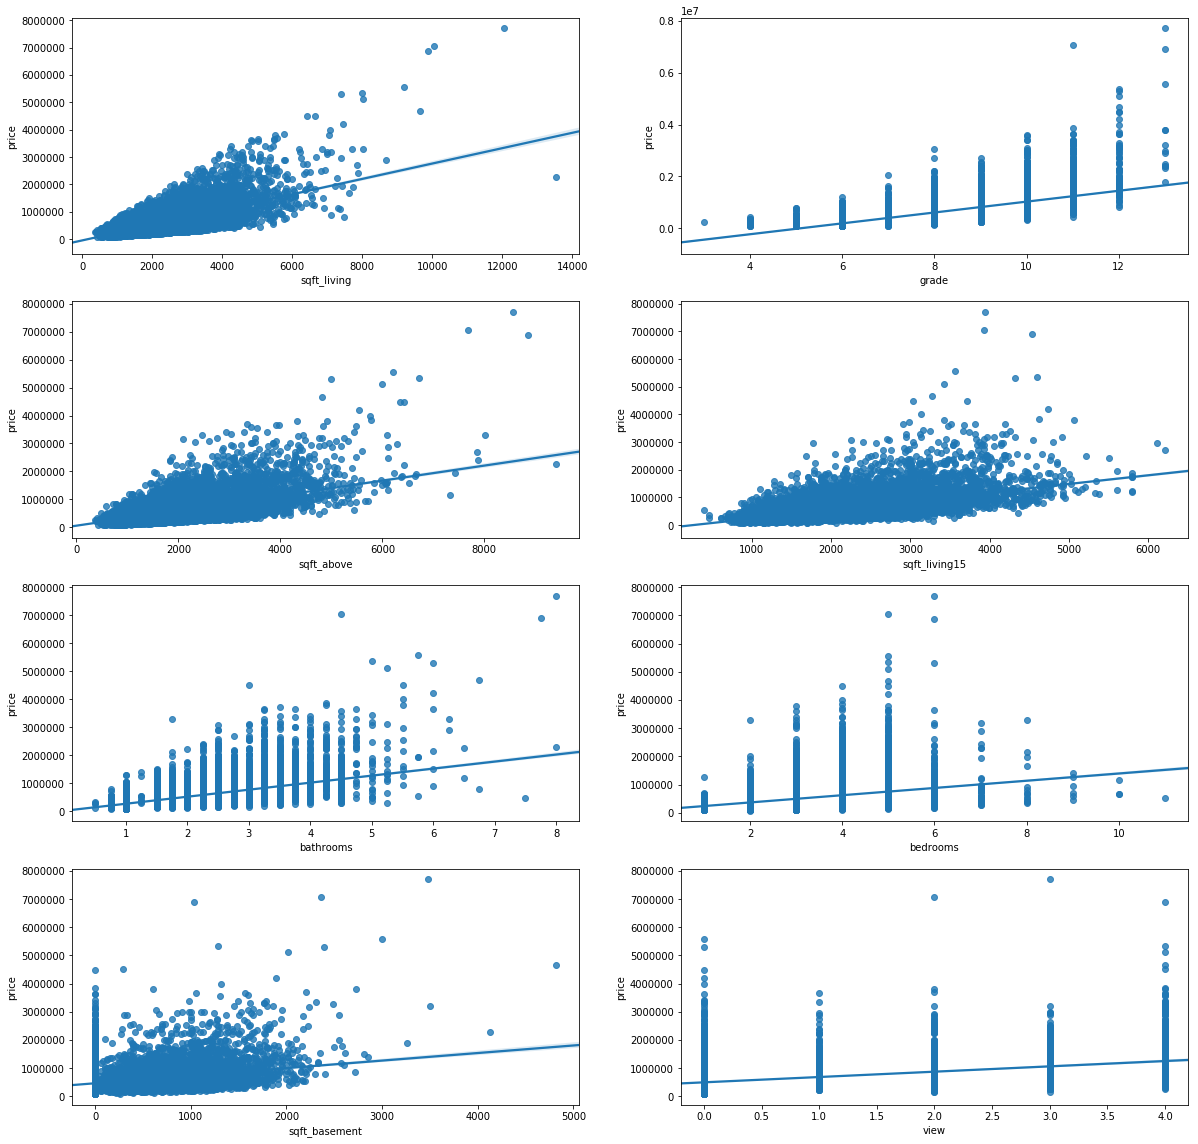

In [18]:
y = df_model['price']

plt.subplots(figsize=(20,20))

plt.subplot(421)
sqft_living_x = df_model['sqft_living']
model = ols(formula = "y~sqft_living_x", data=df_model).fit()
print(f"R-squared: {model.rsquared}")
sns.regplot(x='sqft_living', y='price', data=df_model);

plt.subplot(422)
grade_x = df_model['grade']
model = ols(formula = "y~grade_x", data=df_model).fit()
print(f"R-squared: {model.rsquared}")
sns.regplot(x='grade', y='price', data=df_model);

plt.subplot(423)
sqft_above_x = df_model['sqft_above']
model = ols(formula = "y~sqft_above_x", data=df_model).fit()
print(f"R-squared: {model.rsquared}")
sns.regplot(x='sqft_above', y='price', data=df_model);

plt.subplot(424)
sqft_living15_x = df_model['sqft_living15']
model = ols(formula = "y~sqft_living15_x", data=df_model).fit()
print(f"R-squared: {model.rsquared}")
sns.regplot(x='sqft_living15', y='price', data=df_model);

plt.subplot(425)
bathrooms_x = df_model['bathrooms']
model = ols(formula = "y~bathrooms_x", data=df_model).fit()
print(f"R-squared: {model.rsquared}")
sns.regplot(x='bathrooms', y='price', data=df_model);

plt.subplot(426)
bedrooms_x = df_model['bedrooms']
model = ols(formula = "y~bedrooms_x", data=df_model).fit()
print(f"R-squared: {model.rsquared}")
sns.regplot(x='bedrooms', y='price', data=df_model);

plt.subplot(427)
sqft_basement_x = df_model['sqft_basement']
model = ols(formula = "y~sqft_basement_x", data=df_model).fit()
print(f"R-squared: {model.rsquared}")
sns.regplot(x='sqft_basement', y='price', data=df_model);

plt.subplot(428)
view_x = df_model['view']
model = ols(formula = "y~view_x", data=df_model).fit()
print(f"R-squared: {model.rsquared}")
sns.regplot(x='view', y='price', data=df_model);


The following plot gives an overview of the house prices when it comes to the area of the house. 

In [29]:
map_king_county = folium.Map(location=[47.5112, -122.257],
                    zoom_start = 9) 

# Filter the DF for rows, then columns
heat_df = df_model[df_model['price']<300000]
heat_df = heat_df[['lat', 'long']]

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['long']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_king_county)

# Display the map
map_king_county

The following heatmap shows the distribution of houses with a view value of 4 or higher

In [20]:
map_king_county = folium.Map(location=[47.5112, -122.257],
                    zoom_start = 10) 

# Filter the DF for rows, then columns
heat_df = df_model[df_model['view']>=4]
heat_df = heat_df[['lat', 'long']]

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['long']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_king_county)

# Display the map
map_king_county

As can be seen from the heatmap above, houses located in the north and along waterside excibit higher values for the variable view. Furthermore there are almost 20,000 houses which have not been viewed before they were sold. This seams unreasonable. I therefore conclude that the variable view does not show how often the house has been viewed before it was sold but how good the view is based on a scale from 0 to 4.

In [21]:
df_model.groupby("view").count()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
view,,,,,,,,,,,,,,,,,,,,
0.0,19485,19485,19485,19485,19485,19485,19485,19485,19485,19485,19485,19485,19485,19485,19485,19485,19485,19485,19485,19485
1.0,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330
2.0,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957
3.0,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508,508
4.0,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


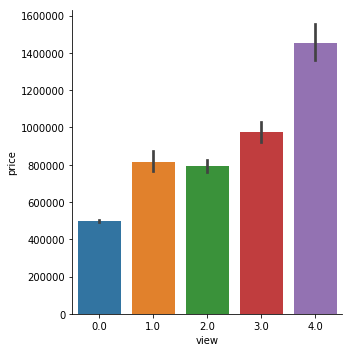

In [22]:
sns.catplot(x="view", y="price", kind="bar", data=df_model);

Based on this analysis I assume that the description of columns was wrong, when it comes to the description of the view property. 

# Feature Engineering

It is not clear, what is meant by renovation of a house and what kind of construction has to take place for the house to count as renovated. Nevertheless I constructed a categorial variable which indicates wheather the house has been renovated or not.

In [23]:
renovated_flag = []
for i in (range(len(df_model))):
    if(df_model['yr_renovated'][i] == 0):
        renovated_flag.append(0)
    else:
         renovated_flag.append(1)

df_model["renovated"] = renovated_flag

In [24]:
df_model.groupby("renovated").count()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
renovated,,,,,,,,,,,,,,,,,,,,,
0,20853,20853,20853,20853,20853,20853,20853,20853,20853,20853,20853,20853,20853,20853,20853,20853,20853,20853,20853,20853,20853
1,744,744,744,744,744,744,744,744,744,744,744,744,744,744,744,744,744,744,744,744,744


It can be seen that the vast majority of houses has never been renovated. Taking into consideration that many of them are more than 100 years old, this seems unreasonable.
Plotting renovation against the sales price, it can be seen that renovated houses realised much higher sales prices but due to the obvious lack of correct data, this variable will not make it into the regression analysis.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


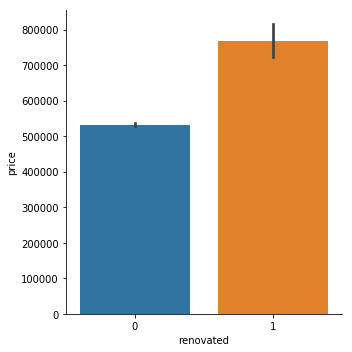

In [25]:
sns.catplot(x="renovated", y="price", kind="bar", data=df_model);

Instead I created a variable called last_building_phase which indicates when construction took place for the last time. Be it renovation or the new construction of the house.

In [26]:
df_model["last_building_phase"] = df_model[["yr_built", "yr_renovated"]].max(axis = 1) 

## Dealing with categorical variables
Many of the 21 colums exhibit categorical variables. In order to use these colums in the multiple linear regression analysis, they have to be coded as so called dummy variables. We will see how this works in the predictive modeling part.

# Predictive Modeling

In the first multiple linear regression model only discrete variables will be used. Namely sqft_above, sqft_living15, bathrooms, bedrooms, sqft_basement, floors, sqft_lot, sqft_lot15, latitude and longitude. I do not use the discrete variable sqft_living as it is the sum of sqft_above and sqfr_basement.

In [27]:
X2 = df_model[['sqft_above', 'sqft_living15', 'bathrooms', 'sqft_basement', 'bedrooms',
               'lat', 'long', 'floors', 'sqft_lot', 'sqft_lot15']]
X2 = sm.add_constant(X2)
y2 = df_model["price"]

X2.head(n=2)

sm.OLS(y2, X2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     3251.
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:49:40   Log-Likelihood:            -2.9747e+05
No. Observations:               21597   AIC:                         5.950e+05
Df Residuals:                   21586   BIC:                         5.950e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.011e+07    1.6e+06    -50.191      0.000   -8.32e+07    -7.7e+07
sqft_above      264.9964      3.875     68.385      0.000     257.401     272.592
sqft_living15    86.1716      3.711     23.221      0.000      78.898      93.445
bathrooms      2.695e+04   3478.456      7.749      0.000    2.01e+04    3.38e+04
sqft_basement   240.5467      4.816     49.949      0.000     231.107     249.986
bedrooms      -5.334e+04   2223.008    -23.995      0.000   -5.77e+04    -4.9e+04
lat            6.512e+05   1.17e+04     55.730      0.000    6.28e+05    6.74e+05
long          -4.019e+05   1.28e+04    -31.523      0.000   -4.27e+05   -3.77e+05
floors        -1.943e+04   3947.183     -4.923      0.000   -2.72e+04   -1.17e+04
sqft_lot          0.2570      0.055      4.658      0.000       0.149       0.365
sqft_lot15       -0.3921      0.085     -4.638      0.000      -0.558      -0.226
==============================================================================
Omnibus:                    17222.690   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1057988.229
Skew:                           3.374   Prob(JB):                         0.00
Kurtosis:                      36.618   Cond. No.                     5.11e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R and R2 value of this first regression amount to 0.601 which mean that 60% of the variance of the dependent variable can be explained by the model. This value is not as high as requested (0.7 - 0.9). The reason for this is the fact that in this first model all of the categorical variables were omitted. Apart from that the model seems to be reasonably specified as the p-values are low and the coefficients enter the regression with the expected sign with exception of the bedrooms and floors coefficients. This could be explained by the fact that sqft_living already enters the regression with a positive sign and this value is highly correlated with bedrooms and floors.

In the second regression model I will use the variables of the first model and add all the categorical variables which were omitted in the first model. In order to do so, so called dummy variables are introduced. These variables take the value 0 or 1 in order to indicate the presence of a categorical effect. Adding these variables to the regression model is of great importance, as we have seen in the correlation analysis that many categorical variables influence the sales price.

In [28]:
model = ols('price ~ C(last_building_phase) + C(grade) + C(zipcode) + C(waterfront) + C(view) + C(condition) + C(renovated) + bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_above + sqft_basement', data=df_model).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     522.5
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:49:41   Log-Likelihood:            -2.8777e+05
No. Observations:               21597   AIC:                         5.760e+05
Df Residuals:                   21385   BIC:                         5.776e+05
Df Model:                         211                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         5.759e+04   1.54e+05      0.375      0.708   -2.44e+05    3.59e+05
C(last_building_phase)[T.1901.0]  -9.19e+04   3.31e+04     -2.775      0.006   -1.57e+05    -2.7e+04
C(last_building_phase)[T.1902.0] -4.553e+04    3.4e+04     -1.338      0.181   -1.12e+05    2.12e+04
C(last_building_phase)[T.1903.0] -3.851e+04   2.86e+04     -1.346      0.178   -9.46e+04    1.76e+04
C(last_building_phase)[T.1904.0] -1.112e+04   2.93e+04     -0.379      0.705   -6.86e+04    4.64e+04
C(last_building_phase)[T.1905.0]  5473.5996   2.61e+04      0.210      0.834   -4.57e+04    5.66e+04
C(last_building_phase)[T.1906.0] -1.173e+04   2.35e+04     -0.499      0.618   -5.78e+04    3.43e+04
C(last_building_phase)[T.1907.0]  6612.6680   2.67e+04      0.247      0.805   -4.58e+04     5.9e+04
C(last_building_phase)[T.1908.0] -5.146e+04   2.44e+04     -2.107      0.035   -9.93e+04   -3583.912
C(last_building_phase)[T.1909.0]  2.226e+04   2.39e+04      0.931      0.352   -2.46e+04    6.91e+04
C(last_building_phase)[T.1910.0] -4347.7685   2.22e+04     -0.196      0.845   -4.78e+04    3.92e+04
C(last_building_phase)[T.1911.0] -2529.9090    2.6e+04     -0.097      0.922   -5.34e+04    4.84e+04
C(last_building_phase)[T.1912.0]  2116.1021   2.51e+04      0.084      0.933   -4.71e+04    5.13e+04
C(last_building_phase)[T.1913.0]  3.239e+04   2.75e+04      1.176      0.239   -2.16e+04    8.64e+04
C(last_building_phase)[T.1914.0] -1.839e+04    2.8e+04     -0.656      0.512   -7.34e+04    3.66e+04
C(last_building_phase)[T.1915.0] -1.349e+04   2.69e+04     -0.501      0.616   -6.62e+04    3.92e+04
C(last_building_phase)[T.1916.0]  9324.9871   2.47e+04      0.378      0.705    -3.9e+04    5.77e+04
C(last_building_phase)[T.1917.0] -1.895e+04   2.71e+04     -0.700      0.484    -7.2e+04    3.41e+04
C(last_building_phase)[T.1918.0] -2.962e+04   2.25e+04     -1.314      0.189   -7.38e+04    1.46e+04
C(last_building_phase)[T.1919.0] -1.174e+04   2.44e+04     -0.481      0.631   -5.96e+04    3.61e+04
C(last_building_phase)[T.1920.0] -1.171e+04   2.36e+04     -0.496      0.620    -5.8e+04    3.46e+04
C(last_building_phase)[T.1921.0] -2340.7010   2.49e+04     -0.094      0.925   -5.11e+04    4.64e+04
C(last_building_phase)[T.1922.0] -1543.5690   2.43e+04     -0.064      0.949   -4.91e+04     4.6e+04
C(last_building_phase)[T.1923.0]   1.67e+04   2.45e+04      0.680      0.496   -3.14e+04    6.48e+04
C(last_building_phase)[T.1924.0] -1.302e+04   2.21e+04     -0.590      0.555   -5.63e+04    3.03e+04
C(last_building_phase)[T.1925.0] -5326.8988   2.12e+04     -0.251      0.802   -4.69e+04    3.63e+04
C(last_building_phase)[T.1926.0]  1.547e+04    2.1e+04      0.737      0.461   -2.57e+04    5.66e+04
C(last_building_phase)[T.1927.0] -5986.0960   2.26e+0

The second regression model is able to explain almost 84% of the variance of the dependent variabe, which is within the required range of 0.7-0.9. 
Compared to the first model it includes all categorical variables and the coefficients behave like expected. 

    - Higher grades lead to higher prices
    - Prices rise with a higer view value of the property
    - The condition of the house is also important for the sales price
    - Beeing located at the waterfront, increses the price of the property
    - As we have already seen in the EDA, beeing located in certain regions of King County increases the price
    - The discrete variables enter the regression with the same sign as in the first model

# Business Recommendations

## For Sellers

Location of the property matters alot. Being located at waterfront or in the north or having a good view increases the price.

When investing money into the house in order to rise the sales price, take care that renovation meassures 
increase the grade in the grading system as higher grades significantly influence the sales price.

The size of the lot is not important. When it comes to the sales price, the sqft of the living room is a much better indicator.

Keeping the house in an overall good condition is important in order to realise a high sales price

The age or the last building phase respectively do not play an important role. It is way more important to keep the house in a good condition and to achieve a good grade.

## For Buyers

As mentioned above, location of the property matters a lot. If you are in search of an affordable property, concentrate your search on the southern region and stay away from the waterfront.

It might be a good idea to buy a house in an overall mediocre condition and increase its grade and condition by renovation which raises the grade. This might still be cheaper than buying a house that already has a good grade.


# Future Work

The dataset completely lacks macroeconomic data like mortgage interest rates, consumer sentiment, disposable income and tax treatment of real estate, which influence the demand and supply of houses.
These data would be benifiting as the macroeconomic environment plays an important role in the housing market. See for instance the Global Financial Crisis 2008/09 which started with a bursting bubble in the real estate market.